In [38]:
from tensorflow import keras
import config
from PIL import Image 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [39]:
train_dir =  config.train_dir


fire_imgs = [fn for fn in os.listdir(f'{train_dir}/Fire') if fn.endswith('.jpg')]
no_fire_imgs = [fn for fn in os.listdir(f'{train_dir}/No_fire') if fn.endswith('.jpg')]

In [40]:
len(fire_imgs), len(no_fire_imgs)

(25018, 14357)

In [41]:
list_category = []
list_size =[]
list_mode = []
list_format = []
list_name = []

for fire_img in fire_imgs:
    list_name.append(fire_img)
    list_category.append('Fire')
    src = os.path.join(train_dir, 'Fire\\'+fire_img)
    #print(src)
    each_image = Image.open(src) 
    list_mode.append(each_image.mode)
    list_size.append(each_image.size)
    list_format.append(each_image.format)
    




In [42]:
for no_fire_img in no_fire_imgs:
    list_name.append(no_fire_img)
    list_category.append('No_Fire')
    src = os.path.join(train_dir, 'No_Fire\\'+no_fire_img)
    #print(src)
    each_image = Image.open(src) 
    list_mode.append(each_image.mode)
    list_size.append(each_image.size)
    list_format.append(each_image.format)

In [43]:
df = pd.DataFrame({'image_name':list_name,'image_size':list_size,'image_mode':list_mode,'image_format':list_format,'category':list_category})

In [44]:
df

,image_name,image_size,image_mode,image_format,category
0,resized_frame0.jpg,"(254, 254)",RGB,JPEG,Fire
1,resized_frame1.jpg,"(254, 254)",RGB,JPEG,Fire
2,resized_frame10.jpg,"(254, 254)",RGB,JPEG,Fire
3,resized_frame100.jpg,"(254, 254)",RGB,JPEG,Fire
4,resized_frame1000.jpg,"(254, 254)",RGB,JPEG,Fire
...,...,...,...,...,...
39370,resized_frame6876.jpg,"(254, 254)",RGB,JPEG,No_Fire
39371,resized_frame6877.jpg,"(254, 254)",RGB,JPEG,No_Fire
39372,resized_frame6878.jpg,"(254, 254)",RGB,JPEG,No_Fire
39373,resized_frame6879.jpg,"(254, 254)",RGB,JPEG,No_Fire


In [45]:
df['category'].value_counts()

Fire       25018
No_Fire    14357
Name: category, dtype: int64

In [46]:
df['image_size'].value_counts()

(254, 254)    39375
Name: image_size, dtype: int64

In [47]:
df['image_mode'].value_counts()

RGB    39375
Name: image_mode, dtype: int64

In [48]:
df['image_format'].value_counts()

JPEG    39375
Name: image_format, dtype: int64

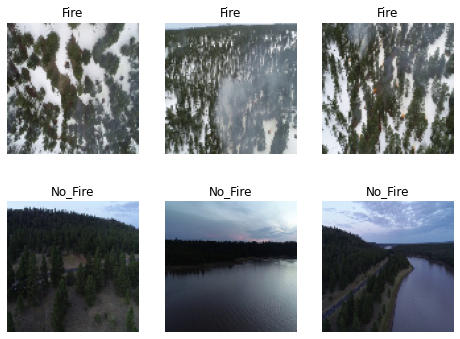

In [53]:
select_fire = np.random.choice(fire_imgs, 3, replace = False)
select_no_fire = np.random.choice(no_fire_imgs, 3, replace = False)

# plotting 2 x 3 image matrix
fig = plt.figure(figsize = (8,6))
for i in range(6):
    if i < 3:
        fp = f'{train_dir}\\Fire\\{select_fire[i]}'
        label = 'Fire'
    else:
        fp = f'{train_dir}\\No_Fire\\{select_no_fire[i-3]}'
        label = 'No_Fire'
    ax = fig.add_subplot(2, 3, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp, target_size = (100,100))
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()



In [54]:
# making n X m matrix
def covert_img_to_np(path, list_of_filename,size=(64,64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp,target_size = size,color_mode = 'grayscale'
                                     )
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        #print('a')
        #print(img_ts)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        #print('b')
        #print(img_ts)
        try:
            # concatenate different images
            #print('c')
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            #print('d')
            full_mat = img_ts
    return full_mat

# run it on our folders
array_fire_images = covert_img_to_np(f'{train_dir}\\Fire\\', fire_imgs)
array_no_fire_images = covert_img_to_np(f'{train_dir}\\No_Fire\\', no_fire_imgs)

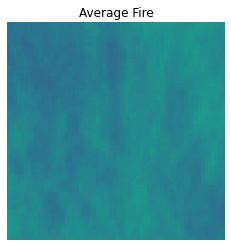

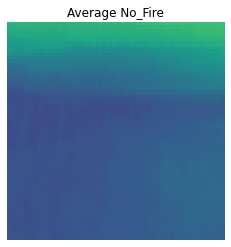

In [55]:
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

fire_mean = find_mean_img(array_fire_images, 'Fire')
no_fire_mean = find_mean_img(array_no_fire_images, 'No_Fire')